In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

In [18]:
data = pd.read_csv('../train.csv')

In [19]:
data

ID  nivel_de_satisfaccion  ultima_evaluacion  cantidad_proyectos  \
0     2876.0                   0.63               0.84                   3   
1     7883.0                   0.11               0.93                   7   
2     4089.0                   0.60               0.42                   2   
3     8828.0                   0.38               0.49                   4   
4     9401.0                   0.11               0.83                   6   
...      ...                    ...                ...                 ...   
7995  8701.0                   0.63               0.85                   2   
7996   501.0                   0.62               0.85                   3   
7997  2834.0                   0.86               1.00                   5   
7998  8245.0                   0.88               0.51                   3   
7999  6215.0                   0.14               0.77                   4   

      promedio_horas_mensuales_trabajadas  años_en_la_empresa  \
0                                     269                   2   
1                                     284                   4   
2                                     109                   6   
3                                     196                   3   
4                                     244                   4   
...                                   ...                 ...   
7995                                  156                   3   
7996                                  237                   3   
7997                                  257                   5   
7998                                  208                   3   
7999                                  166                   5   

      tuvo_un_accidente_laboral  promociones_ultimos_5_anios  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            1   
4                             0                            0   
...                         ...                          ...   
7995                          1                            0   
7996                          1                            0   
7997                          0                            0   
7998                          0                            0   
7999                          0                            0   

                      area salario se_fue  
0     gestión de productos    bajo     no  
1                  tecnica    bajo     si  
2                   ventas    bajo     no  
3                dirección    alto     no  
4             contabilidad    bajo     si  
...                    ...     ...    ...  
7995                  RRHH   medio     no  
7996                    TI   medio     no  
7997               tecnica   medio     si  
7998                  RRHH   medio     no  
7999                ventas    bajo     no  

[8000 rows x 11 columns]

## EDA

In [20]:
data.describe()

ID  nivel_de_satisfaccion  ultima_evaluacion  \
count   8000.000000            8000.000000        8000.000000   
mean    5001.856375               0.611250           0.717285   
std     2879.555515               0.248972           0.171529   
min        1.000000               0.090000           0.360000   
25%     2513.500000               0.440000           0.560000   
50%     4994.500000               0.640000           0.720000   
75%     7498.250000               0.820000           0.870000   
max    10000.000000               1.000000           1.000000   

       cantidad_proyectos  promedio_horas_mensuales_trabajadas  \
count         8000.000000                          8000.000000   
mean             3.802625                           201.246125   
std              1.234447                            50.055105   
min              2.000000                            96.000000   
25%              3.000000                           156.000000   
50%              4.000000                           201.000000   
75%              5.000000                           245.000000   
max              7.000000                           310.000000   

       años_en_la_empresa  tuvo_un_accidente_laboral  \
count         8000.000000                8000.000000   
mean             3.495375                   0.148750   
std              1.476483                   0.355864   
min              2.000000                   0.000000   
25%              3.000000                   0.000000   
50%              3.000000                   0.000000   
75%              4.000000                   0.000000   
max             10.000000                   1.000000   

       promociones_ultimos_5_anios  
count                  8000.000000  
mean                      0.022375  
std                       0.147909  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%                       0.000000  
max                       1.000000

In [21]:
for c in ['se_fue','area','salario']:
    print(c.upper())
    print(data[c].value_counts(),'\n')

SE_FUE
no    6112
si    1888
Name: se_fue, dtype: int64 

AREA
ventas                  2207
tecnica                 1489
soporte                 1178
TI                       642
gestión de productos     492
marketing                442
ImásD                    431
RRHH                     399
contabilidad             395
dirección                325
Name: area, dtype: int64 

SALARIO
bajo     3894
medio    3452
alto      654
Name: salario, dtype: int64 



Podemos ver que casi un cuarto de los empleados se fueron de la empresa y por ende las clases estan medianamete desbalanceadas.

Las 3 areas con mas empleador son ventas, tecnica y soporte. Tienen una marcada diferencia en cuanto a tamaño respecto a las otras areas, podemos explorar tambien la distribucion de salario en esas areas.

En cuanto a los salarios como es de esperarse a mayor salario menos cantidad de individuos. Los salarios medios son similares en cantidad a los bajos lo que seguramente este relacionado con alguna de las otras features como distribucion de la antiguedad o quizas el rubro de la empresa.

<AxesSubplot:xlabel='area', ylabel='salario'>

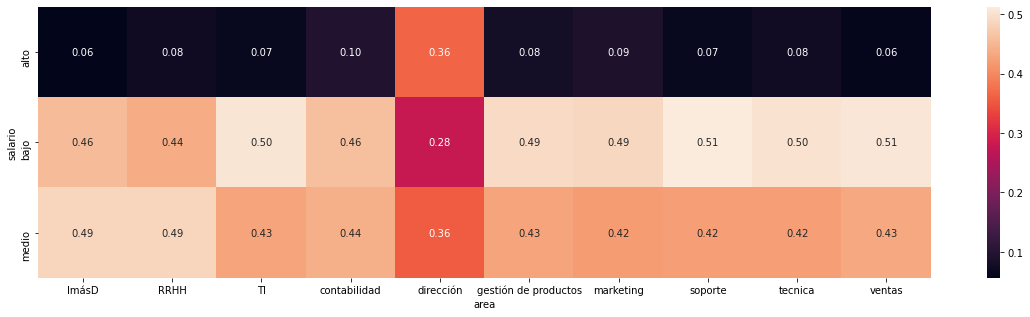

In [22]:
plt.figure(figsize=(20,5))
data_heatmap = data.groupby(by=['salario','area']).count()['ID'].unstack(level=1)
data_heatmap = data_heatmap.apply(lambda x: x/x.sum(),axis=0)
sns.heatmap(data_heatmap,annot=True,fmt='.2f')

Vemos la distribucion de salarios para cada area

<AxesSubplot:xlabel='se_fue', ylabel='salario'>

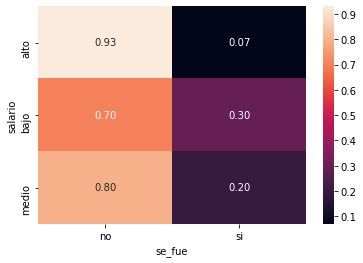

In [8]:
data_heatmap = data.groupby(by=['salario','se_fue']).count()['ID'].unstack(level=1)
data_heatmap = data_heatmap.apply(lambda x: x/x.sum(),axis=1)
sns.heatmap(data_heatmap,annot=True,fmt='.2f')

In [ ]:
data_heatmap

<AxesSubplot:xlabel='se_fue', ylabel='area'>

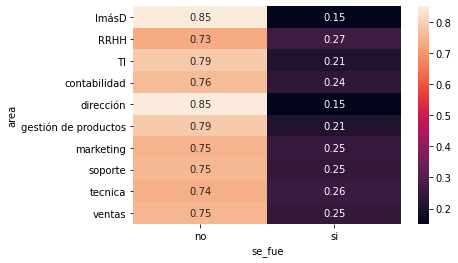

In [9]:
data_heatmap = data.groupby(by=['area','se_fue']).count()['ID'].unstack(level=1)
data_heatmap = data_heatmap.apply(lambda x: x/x.sum(),axis=1)
sns.heatmap(data_heatmap,annot=True,fmt='.2f')

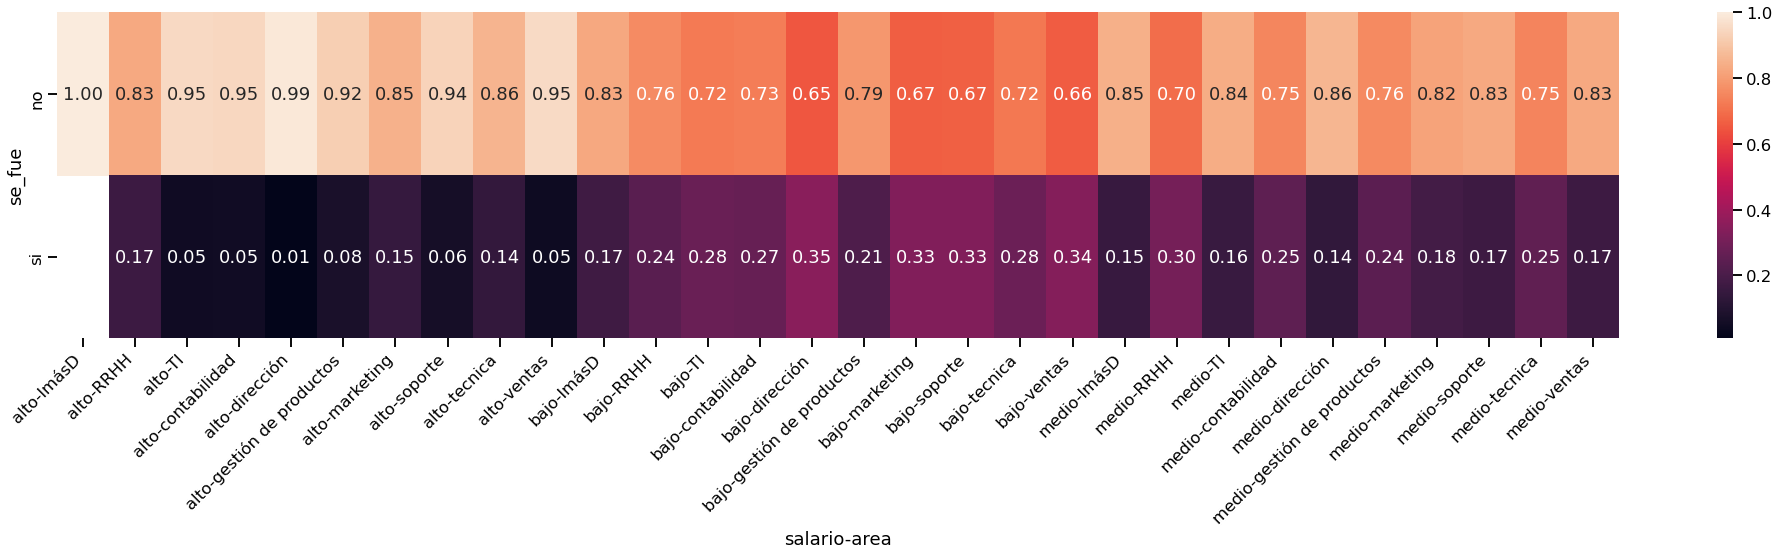

In [10]:
sns.set_context(context='talk')
plt.figure(figsize=(35,6))
data_heatmap = data.groupby(by=['salario','area','se_fue']).count()['ID'].unstack(level=2)
data_heatmap = data_heatmap.apply(lambda x: x/x.sum(),axis=1)
sns.heatmap(data_heatmap.T,annot=True,fmt='.2f')
plt.xticks(rotation = 45,ha='right')
plt.show()
sns.set_context(context='notebook')

Observando los graficos generados, salario, area y la combinacion de ambas no parecen ser una variables que separen a los grupos de forma marcada.

In [11]:
data.dtypes

ID                                     float64
nivel_de_satisfaccion                  float64
ultima_evaluacion                      float64
cantidad_proyectos                       int64
promedio_horas_mensuales_trabajadas      int64
años_en_la_empresa                       int64
tuvo_un_accidente_laboral                int64
promociones_ultimos_5_anios              int64
area                                    object
salario                                 object
se_fue                                  object
dtype: object

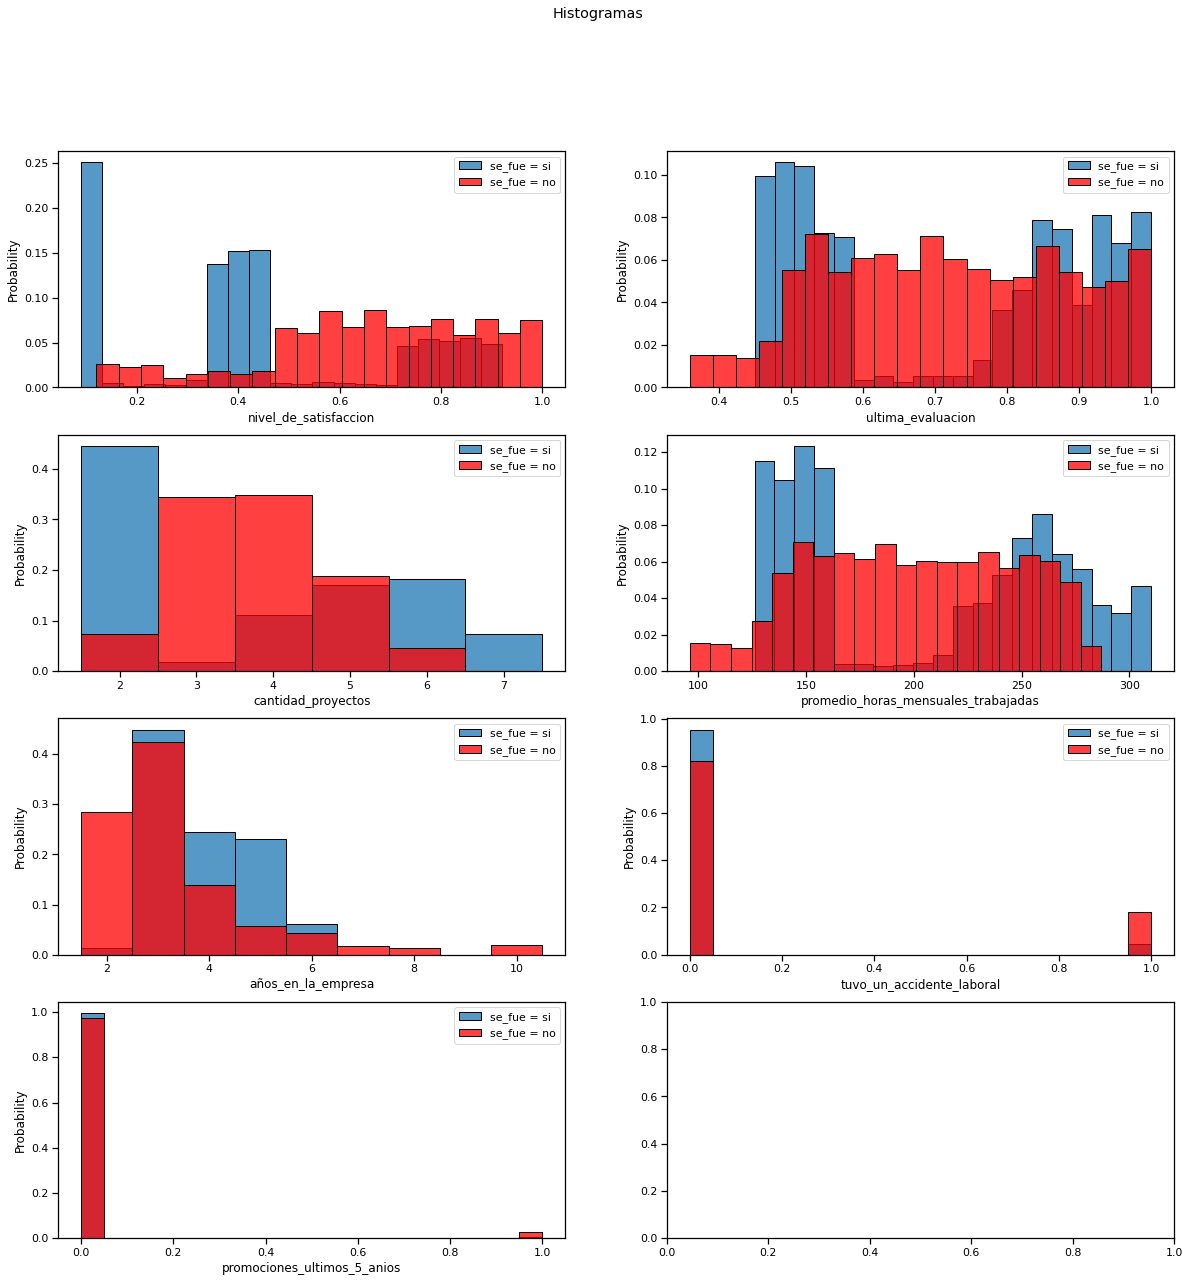

In [12]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(20,20))
fig.suptitle('Histogramas')
stat = "probability" #{"count", "frequency", "density", "probability"}
for c, ax in zip(data.drop(columns=['ID','area','salario','se_fue']).columns, axes.flatten()):
    if c in ['cantidad_proyectos','años_en_la_empresa']:
        discrete = True
        bins = 'auto'
    else:
        discrete=False
        bins = 20
    
    sns.histplot(data=data.loc[data.se_fue=='si',c], ax=ax,stat=stat, discrete=discrete,bins=bins)
    sns.histplot(data=data.loc[data.se_fue=='no',c],ax=ax,color='red',stat=stat, discrete=discrete,bins=bins)
    ax.legend(['se_fue = si', 'se_fue = no'])

Podemos ver que la variable nivel_de_satisfaccion podria llegar a separar relativamente bien las clases. Par algunas de las otras variables se ve que la clase que se_fue=si es bimodal y la clase se_fue=no es unimodal, lo que podria ser util para modelos de arboles o naive bayes.

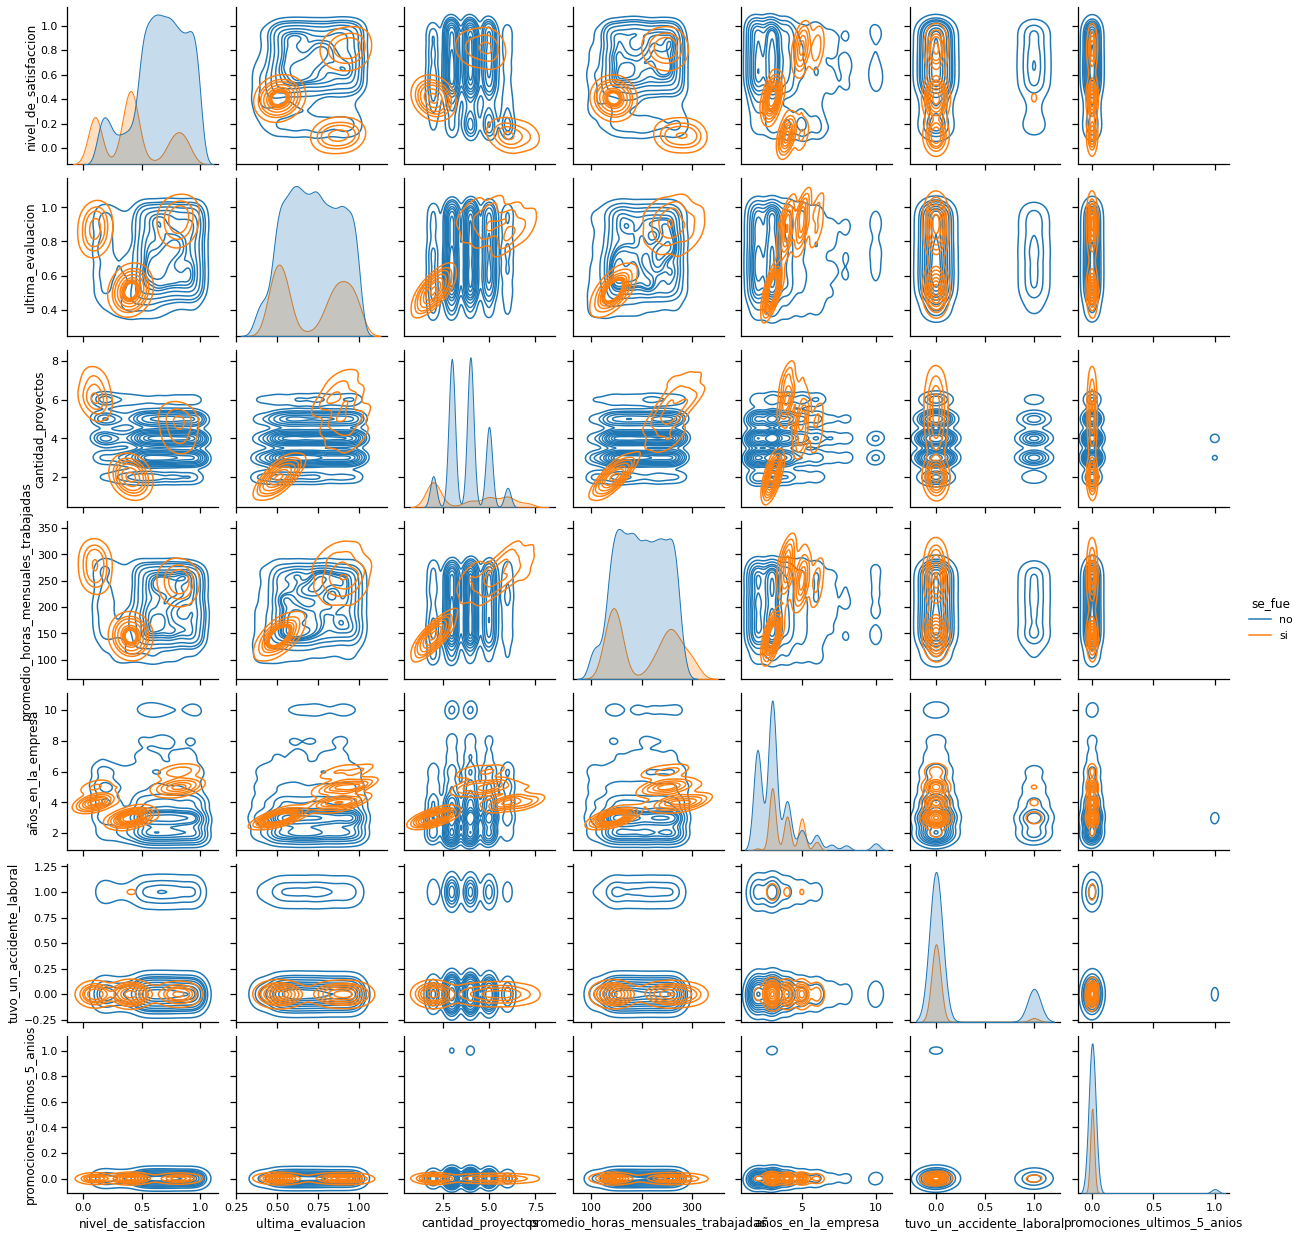

In [13]:
sns.pairplot(data.drop(columns='ID'), hue='se_fue',kind='kde')

Al realizar los pairplor con tipo=kde, lo cual no es ideal para algunas de las variables discretas pero aun mejor que el scatterplot, se ve la formacion de que no siempre estan alineados para ambas clases, lo que nuevamente podria favorecer un modelo de naive bayes o de knn.

En los unicos graficos que pareceria poder haber una separacion con una recta es en el grafico ultima_evaluacion vs años_en_la_empresa y ultima_evaluacion vs años_en_la_empresa, por lo que quizas la regresion logistica no tenga el mejor resultado.

Un grafico interesante para plantear regresiones lineales es el de promedio_horas_mensuales_trabajadas vs cantidad_proyectos.

<AxesSubplot:xlabel='promedio_horas_mensuales_trabajadas', ylabel='cantidad_proyectos'>

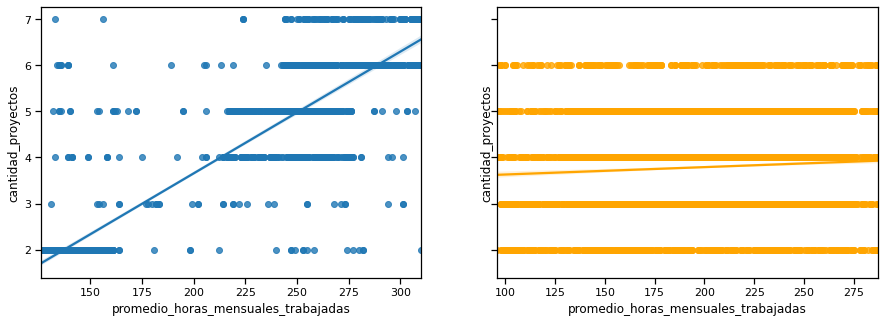

In [14]:
fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(15,5))
sns.regplot(data=data.loc[data.se_fue=='si'],x='promedio_horas_mensuales_trabajadas',y='cantidad_proyectos',ax=ax1)
sns.regplot(data=data.loc[data.se_fue=='no'],x='promedio_horas_mensuales_trabajadas',y='cantidad_proyectos',ax=ax2,color='orange')

La diferencia en las rectas no es tan marcada, de todos modos se podrian generar nuevas features con PSA y ver si beneficia a los modelos.

## Preprocesamiento

In [15]:
data.head(2)

ID  nivel_de_satisfaccion  ultima_evaluacion  cantidad_proyectos  \
0  2876.0                   0.63               0.84                   3   
1  7883.0                   0.11               0.93                   7   

   promedio_horas_mensuales_trabajadas  años_en_la_empresa  \
0                                  269                   2   
1                                  284                   4   

   tuvo_un_accidente_laboral  promociones_ultimos_5_anios  \
0                          0                            0   
1                          0                            0   

                   area salario se_fue  
0  gestión de productos    bajo     no  
1               tecnica    bajo     si

Variables dummies

In [16]:
data_preprocess = pd.get_dummies(data=data,columns=['area'],drop_first=True)# las dummies seran respecto a ImasD ya que fue eliminada
data_preprocess.head(2)

ID  nivel_de_satisfaccion  ultima_evaluacion  cantidad_proyectos  \
0  2876.0                   0.63               0.84                   3   
1  7883.0                   0.11               0.93                   7   

   promedio_horas_mensuales_trabajadas  años_en_la_empresa  \
0                                  269                   2   
1                                  284                   4   

   tuvo_un_accidente_laboral  promociones_ultimos_5_anios salario se_fue  \
0                          0                            0    bajo     no   
1                          0                            0    bajo     si   

   area_RRHH  area_TI  area_contabilidad  area_dirección  \
0          0        0                  0               0   
1          0        0                  0               0   

   area_gestión de productos  area_marketing  area_soporte  area_tecnica  \
0                          1               0             0             0   
1                          0               0             0             1   

   area_ventas  
0            0  
1            0

Pasamos la variable salario a una variable numerica, de esta forma asumimos que la distancia entre medio y bajo es la misma que alto y medio.

In [17]:
data_preprocess.salario = data_preprocess.salario.map({'bajo': 0, 'medio': 1, 'alto':2})

In [18]:
data_preprocess.se_fue = data_preprocess.se_fue.map({'si':1,'no':0})

In [19]:
data_preprocess.drop(columns='ID',inplace=True)

In [20]:
data_preprocess.head(10)

nivel_de_satisfaccion  ultima_evaluacion  cantidad_proyectos  \
0                   0.63               0.84                   3   
1                   0.11               0.93                   7   
2                   0.60               0.42                   2   
3                   0.38               0.49                   4   
4                   0.11               0.83                   6   
5                   0.77               0.58                   4   
6                   0.45               0.51                   2   
7                   0.95               0.68                   5   
8                   0.37               0.54                   2   
9                   0.80               0.81                   5   

   promedio_horas_mensuales_trabajadas  años_en_la_empresa  \
0                                  269                   2   
1                                  284                   4   
2                                  109                   6   
3                                  196                   3   
4                                  244                   4   
5                                  243                   4   
6                                  147                   3   
7                                  225                   3   
8                                  145                   3   
9                                  248                   2   

   tuvo_un_accidente_laboral  promociones_ultimos_5_anios  salario  se_fue  \
0                          0                            0        0       0   
1                          0                            0        0       1   
2                          0                            0        0       0   
3                          0                            1        2       0   
4                          0                            0        0       1   
5                          1                            1        1       0   
6                          0                            0        0       1   
7                          0                            0        1       0   
8                          0                            0        1       1   
9                          1                            0        0       0   

   area_RRHH  area_TI  area_contabilidad  area_dirección  \
0          0        0                  0               0   
1          0        0                  0               0   
2          0        0                  0               0   
3          0        0                  0               1   
4          0        0                  1               0   
5          0        0                  0               0   
6          0        0                  0               0   
7          0        0                  0               0   
8          0        0                  0               0   
9          0        0                  0               0   

   area_gestión de productos  area_marketing  area_soporte  area_tecnica  \
0                          1               0             0             0   
1                          0               0             0             1   
2                          0               0             0             0   
3                          0               0             0             0   
4                          0               0             0             0   
5                          0               0             0             0   
6                          0               0             0             0   
7                          0               0             0             0   
8                          0               0             0             0   
9                          0               0             0             0   

   area_ventas  
0            0  
1            0  
2            1  
3            0  
4            0  
5            1  
6            1  
7            1  
8            0  
9            0

In [21]:
X = data_preprocess.drop(columns=['se_fue'])
y = data_preprocess.se_fue

In [22]:
X.head(2)

nivel_de_satisfaccion  ultima_evaluacion  cantidad_proyectos  \
0                   0.63               0.84                   3   
1                   0.11               0.93                   7   

   promedio_horas_mensuales_trabajadas  años_en_la_empresa  \
0                                  269                   2   
1                                  284                   4   

   tuvo_un_accidente_laboral  promociones_ultimos_5_anios  salario  area_RRHH  \
0                          0                            0        0          0   
1                          0                            0        0          0   

   area_TI  area_contabilidad  area_dirección  area_gestión de productos  \
0        0                  0               0                          1   
1        0                  0               0                          0   

   area_marketing  area_soporte  area_tecnica  area_ventas  
0               0             0             0            0  
1               0             0             1            0

In [23]:
y.head(2)

0    0
1    1
Name: se_fue, dtype: int64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True, stratify = y, test_size=0.25,random_state=1)

Normalizamos las features para poder implementar correctamente el modelos de KNN y llegado el caso regularizacion.

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()

In [129]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
knn_model = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

In [132]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_jobs=-1)

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

In [135]:
def metrics(y_test,predictions):
    print('recall score: ',recall_score(y_test,predictions))
    print('f1 score: ',f1_score(y_test,predictions))
    print('accuracy score: ',accuracy_score(y_test,predictions))
    sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d')
    plt.title('Matriz de confusion en test')
    plt.xlabel("Predicho")
    plt.ylabel("Real")

In [172]:
knn_predictions_train = knn_model.predict(X_train_scaled)

recall score:  0.9124293785310734
f1 score:  0.8987826086956522
accuracy score:  0.9515


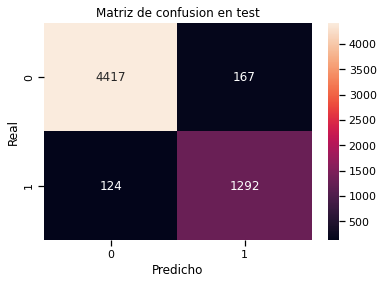

In [173]:
metrics(y_train,knn_predictions_train)

In [137]:
from sklearn.model_selection import StratifiedKFold

In [138]:
cv = StratifiedKFold(5)

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
param_grid_knn = {'n_neighbors':range(3,10,2)}

In [141]:
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),cv=cv,param_grid=param_grid_knn)

In [142]:
knn_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': range(3, 10, 2)})

In [143]:
knn_grid.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

recall score:  0.9449152542372882
f1 score:  0.9278779472954231
accuracy score:  0.9653333333333334


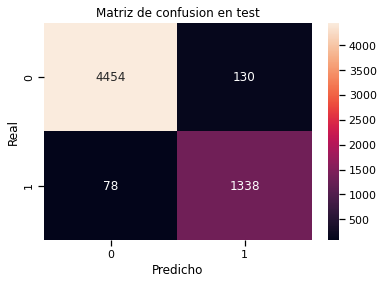

In [176]:
knn_grid_predictions_train = knn_grid.predict(X_train_scaled)
metrics(y_train,knn_grid_predictions_train)

Este modelo ajusta bastante bien a los datos, se debe verificar en test pero cuenta con alto recall y accuracy.

## Naive Bayes

In [145]:
from sklearn.naive_bayes import GaussianNB

Utilizare la version gauseana, pero para distintas features se podrian usar los distintos modelos de NB y luego combinarlos.

In [146]:
class_weights = dict(1/(y_train.value_counts()/y_train.shape[0]))
class_weights

{0: 1.3089005235602094, 1: 4.237288135593221}

In [147]:
sample_weight = y_train.map(class_weights)
sample_weight.head(4)

3065    1.308901
7917    1.308901
5999    1.308901
2401    1.308901
Name: se_fue, dtype: float64

Sin sample weight

recall score:  0.7711864406779662
f1 score:  0.5859940971290584
accuracy score:  0.7428333333333333


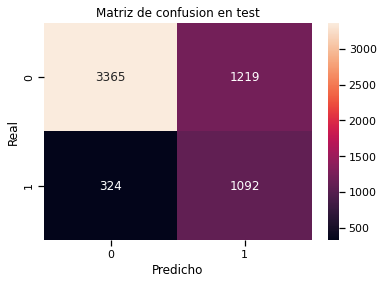

In [182]:
print('Sin sample weight\n')
gauss_model = GaussianNB()
gauss_model.fit(X_train,y_train)
gauss_predictions_train = gauss_model.predict(X_train)
metrics(y_train,gauss_predictions_train)

Con sample weight

recall score:  0.9032485875706214
f1 score:  0.5085487077534792
accuracy score:  0.588


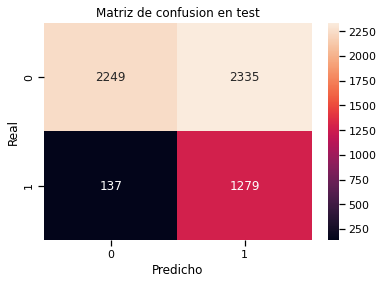

In [186]:
print('Con sample weight\n')
gauss_model = GaussianNB()
gauss_model.fit(X_train,y_train,sample_weight=sample_weight)
gauss_predictions_train = gauss_model.predict(X_train)
metrics(y_train,gauss_predictions_train)

Aplicando sample_weight inverso a la fraccion de cada clase en y_train se obtiene un recall mejor que sin aplicar sample_weight al costo de empeorar el accuracy y el f1 score. No resulta mejor que el modelo de KNN

## Regresion Logistica

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
logistic_model = LogisticRegression(class_weight='balanced',solver='liblinear')

In [152]:
param_grid_log = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10]}

In [153]:
log_grid = GridSearchCV(estimator=logistic_model,cv=cv,param_grid=param_grid_log,scoring=['recall','accuracy'],refit='recall')

In [154]:
log_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             refit='recall', scoring=['recall', 'accuracy'])

In [155]:
log_grid.best_params_

{'C': 10, 'penalty': 'l2'}

recall score:  0.7959039548022598
f1 score:  0.6135002721829069
accuracy score:  0.7633333333333333


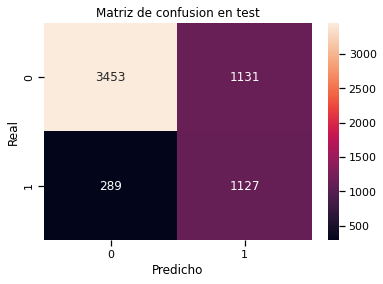

In [187]:
log_grid_predictions_train = log_grid.predict(X_train_scaled)
metrics(y_train,log_grid_predictions_train)

La regresion logistica predice de forma similar al modelo de Naive Bayes sin sample_weight, el recall no es malo pero no tan bueno como el modelo de KNN y el accuracy es bastante menor.

## Arbol de decision

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
tree_model = DecisionTreeClassifier()

In [160]:
param_grid_tree = {'criterion':["gini", "entropy"],'max_depth':range(3,15),'min_samples_split':[50,100,200,300],'min_samples_leaf':[50,100]}

In [161]:
tree_grid = GridSearchCV(estimator=tree_model,cv=cv,param_grid=param_grid_tree,scoring=['recall','accuracy'],refit='recall',verbose=1)

In [162]:
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   14.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 15),
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [50, 100, 200, 300]},
             refit='recall', scoring=['recall', 'accuracy'], verbose=1)

In [163]:
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

recall score:  0.9336158192090396
f1 score:  0.8857621440536013
accuracy score:  0.9431666666666667


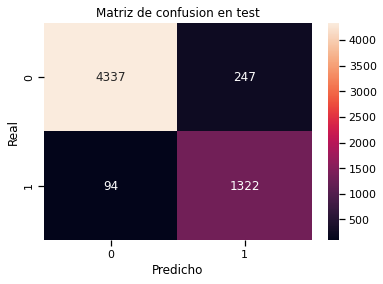

In [192]:
tree_grid_predictions_train = tree_grid.predict(X_train)
metrics(y_train,tree_grid_predictions_train)

In [197]:
pd.Series(data=tree_grid.best_estimator_.feature_importances_,index=X_train.columns).sort_values(ascending=False)

nivel_de_satisfaccion                  0.458822
años_en_la_empresa                     0.246870
cantidad_proyectos                     0.210874
ultima_evaluacion                      0.083434
salario                                0.000000
promedio_horas_mensuales_trabajadas    0.000000
tuvo_un_accidente_laboral              0.000000
promociones_ultimos_5_anios            0.000000
area_ventas                            0.000000
area_tecnica                           0.000000
area_TI                                0.000000
area_contabilidad                      0.000000
area_dirección                         0.000000
area_gestión de productos              0.000000
area_marketing                         0.000000
area_soporte                           0.000000
area_RRHH                              0.000000
dtype: float64

Este modelo nos permite ver las features que mas impactaron(por reduccion de entropia) a la hora de predecir si una persona si habia ido o no de la empresa.

Variables que separaban bien los histogramas como nivel_de_satisfaccion, años_en_la_empresa y cantidad_proyectos. Otras variables que tambien separaban en cierta medida los datos como ultima_evaluacion y promedio_horas_mensuales_trabajadas no fueron utilizadas por este modelo.

Con otros modelos como random forest quizas si se vea el impacto de mas variables pero tambien podria ser que esas variables no esten aportando informacion adicional.

In [167]:
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

In [168]:
from sklearn.tree import plot_tree

In [169]:
plt.figure(dpi=5000) #Ajustar los pdi para visualizar
plot_tree(tree_grid.best_estimator_,feature_names=X_train.columns)
plt.show()

El modelo de arbol de decision cuenta con metricas similares a las del modelo de KNN, con un recall levemente mejor y un accuracy levemente menor. Al ser un arbol de decision existe la posibilidad que este sobreajustando a los datos de entrenamiento, pero ya que la maxima profundida es baja y se uno cross-validation es probable que no este sobreajustando.

## Verificacion con datos de test

In [174]:
knn_predictions_test = knn_model.predict(X_test_scaled)

KNN

recall score:  0.8834745762711864
f1 score:  0.8633540372670808
accuracy score:  0.934


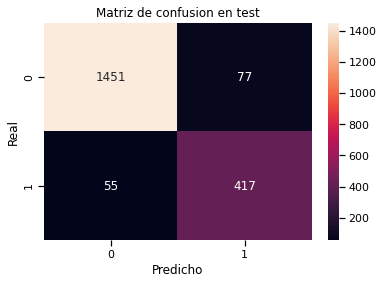

In [181]:
print('KNN\n')
metrics(y_test,knn_predictions_test)

KNN cv

recall score:  0.8877118644067796
f1 score:  0.8683937823834197
accuracy score:  0.9365


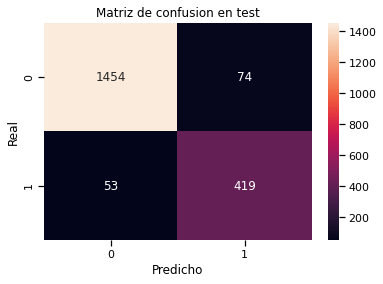

In [183]:
print('KNN cv\n')
knn_grid_predictions_test = knn_grid.predict(X_test_scaled)
metrics(y_test,knn_grid_predictions_test)

Gaussean NB
Con sample weight

recall score:  0.8665254237288136
f1 score:  0.49455864570737607
accuracy score:  0.582


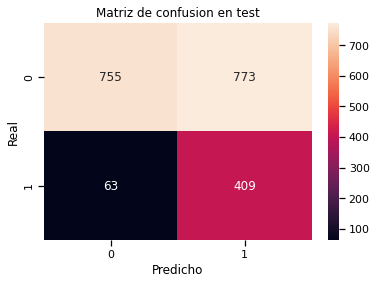

In [190]:
print('Gaussean NB\nCon sample weight\n')
gauss_predictions_test = gauss_model.predict(X_test)
metrics(y_test,gauss_predictions_test)

Regresion logistica

recall score:  0.7838983050847458
f1 score:  0.5905826017557861
accuracy score:  0.7435


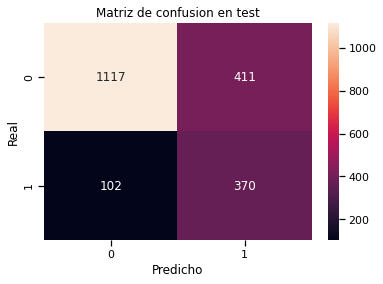

In [191]:
print('Regresion logistica\n')
log_grid_predictions_test = log_grid.predict(X_test_scaled)
metrics(y_test,log_grid_predictions_test)

Arbol de decision
recall score:  0.9216101694915254
f1 score:  0.8877551020408164
accuracy score:  0.945


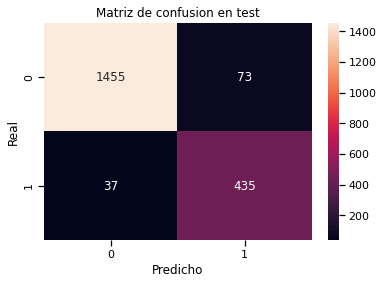

In [194]:
print('Arbol de decision')
tree_grid_predictions_test = tree_grid.predict(X_test)
metrics(y_test,tree_grid_predictions_test)

Comparando los datos de test, el modelo de arbol de decision resulta mejor que el de KNN por lo que se va a utilizar para le prediccion.

## Prediccion

In [212]:
X.head(2)

nivel_de_satisfaccion  ultima_evaluacion  cantidad_proyectos  \
0                   0.63               0.84                   3   
1                   0.11               0.93                   7   

   promedio_horas_mensuales_trabajadas  años_en_la_empresa  \
0                                  269                   2   
1                                  284                   4   

   tuvo_un_accidente_laboral  promociones_ultimos_5_anios  salario  area_RRHH  \
0                          0                            0        0          0   
1                          0                            0        0          0   

   area_TI  area_contabilidad  area_dirección  area_gestión de productos  \
0        0                  0               0                          1   
1        0                  0               0                          0   

   area_marketing  area_soporte  area_tecnica  area_ventas  
0               0             0             0            0  
1               0             0             1            0

In [267]:
X_predict = pd.read_csv('../test.csv')
answer = X_predict[['ID']].astype(int)
X_predict.head(5)

ID  nivel_de_satisfaccion  ultima_evaluacion  cantidad_proyectos  \
0   2.0                   0.40               0.57                   2   
1   4.0                   0.54               0.52                   3   
2   9.0                   0.72               0.87                   5   
3  14.0                   0.65               0.67                   3   
4  15.0                   0.54               0.95                   4   

   promedio_horas_mensuales_trabajadas  años_en_la_empresa  \
0                                  152                   3   
1                                  115                   3   
2                                  223                   5   
3                                  245                   3   
4                                  256                   3   

   tuvo_un_accidente_laboral  promociones_ultimos_5_anios          area  \
0                          0                            0        ventas   
1                          0                            0  contabilidad   
2                          0                            0        ventas   
3                          0                            0        ventas   
4                          0                            0       soporte   

  salario  se_fue  
0    bajo     NaN  
1    bajo     NaN  
2    bajo     NaN  
3   medio     NaN  
4    bajo     NaN

In [268]:
X_predict.drop(columns=['ID','se_fue'],inplace=True)
X_predict = pd.get_dummies(data=X_predict,columns=['area'],drop_first=True)
X_predict.salario = X_predict.salario.map({'bajo': 0, 'medio': 1, 'alto':2})

In [269]:
X_train.head(2)

nivel_de_satisfaccion  ultima_evaluacion  cantidad_proyectos  \
3065                   0.57               0.69                   3   
7917                   0.29               0.91                   4   

      promedio_horas_mensuales_trabajadas  años_en_la_empresa  \
3065                                  154                   2   
7917                                  183                   4   

      tuvo_un_accidente_laboral  promociones_ultimos_5_anios  salario  \
3065                          0                            0        0   
7917                          0                            0        0   

      area_RRHH  area_TI  area_contabilidad  area_dirección  \
3065          0        0                  0               0   
7917          0        0                  0               0   

      area_gestión de productos  area_marketing  area_soporte  area_tecnica  \
3065                          0               0             0             0   
7917                          0               0             0             0   

      area_ventas  
3065            0  
7917            0

In [270]:
X.head(2)

nivel_de_satisfaccion  ultima_evaluacion  cantidad_proyectos  \
0                   0.63               0.84                   3   
1                   0.11               0.93                   7   

   promedio_horas_mensuales_trabajadas  años_en_la_empresa  \
0                                  269                   2   
1                                  284                   4   

   tuvo_un_accidente_laboral  promociones_ultimos_5_anios  salario  area_RRHH  \
0                          0                            0        0          0   
1                          0                            0        0          0   

   area_TI  area_contabilidad  area_dirección  area_gestión de productos  \
0        0                  0               0                          1   
1        0                  0               0                          0   

   area_marketing  area_soporte  area_tecnica  area_ventas  
0               0             0             0            0  
1               0             0             1            0

In [271]:
X_predict.head(2)

nivel_de_satisfaccion  ultima_evaluacion  cantidad_proyectos  \
0                   0.40               0.57                   2   
1                   0.54               0.52                   3   

   promedio_horas_mensuales_trabajadas  años_en_la_empresa  \
0                                  152                   3   
1                                  115                   3   

   tuvo_un_accidente_laboral  promociones_ultimos_5_anios  salario  area_RRHH  \
0                          0                            0        0          0   
1                          0                            0        0          0   

   area_TI  area_contabilidad  area_dirección  area_gestión de productos  \
0        0                  0               0                          0   
1        0                  1               0                          0   

   area_marketing  area_soporte  area_tecnica  area_ventas  
0               0             0             0            1  
1               0             0             0            0

In [272]:
y.head(2)

0    0
1    1
Name: se_fue, dtype: int64

In [273]:
prediction_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 3, 
                                         min_samples_leaf=100, min_samples_split=50)
#los ultimo dos parametros no limitaron el arbol en train.

prediction_tree.fit(X,y)

y_predicted = prediction_tree.predict(X_predict)

In [274]:
answer['se_fue'] = y_predicted

In [275]:
answer.to_csv('prediccion_a.csv',index=False)